In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

def HepHist(data,nbins,xlims,xtrim=False,color='blue',label='',norm=False,fill=False,alpha=0.1):
    ls = '-'
    lw = 2
    plt.rcParams['hatch.color'] = color
    hist, bin_edges = np.histogram(data,bins=nbins,range=xlims)
    bin_center = [(bin_edges[i] + bin_edges[i+1])/2. for i in range(len(bin_edges)-1)]
    xerr = (bin_center[1]-bin_center[0])/2.
    yerr = np.sqrt(hist)
    if norm:
        normFactor = float(np.sum(hist))
        hist = hist/normFactor
        yerr = yerr/normFactor
    plt.step(bin_edges[:-1],hist,where='post',color=color,linestyle=ls,lw=lw,label=label)
    plt.errorbar(bin_center,hist,xerr=xerr,fmt='.',color=color,lw=lw)
    plt.errorbar(bin_center,hist,yerr=yerr,fmt='.',color=color,lw=lw,capsize=3,elinewidth=1)
    if fill:      
        xfill = []
        yfill = []
        for x in bin_edges:
            xfill.append(x)
            xfill.append(x)
        for y in hist:
            yfill.append(y)
            yfill.append(y)    
        xfill = xfill[1:-1]
        plt.fill_between(xfill,0,yfill,facecolor=color,alpha=alpha,lw=0)
    plt.plot([bin_edges[0],bin_edges[0]],[0,hist[0]],color=color,ls=ls,lw=lw)
    plt.plot([bin_edges[-1],bin_edges[-1]],[0,hist[-1]],color=color,ls=ls,lw=lw)
    if xtrim: plt.xlim(xlims)
    if hist.max() > plt.gca().get_ylim()[1]*0.9: plt.gca().set_ylim(top=hist.max()*1.1)
    plt.gca().set_ylim(bottom=0)
    plt.grid(ls='--')

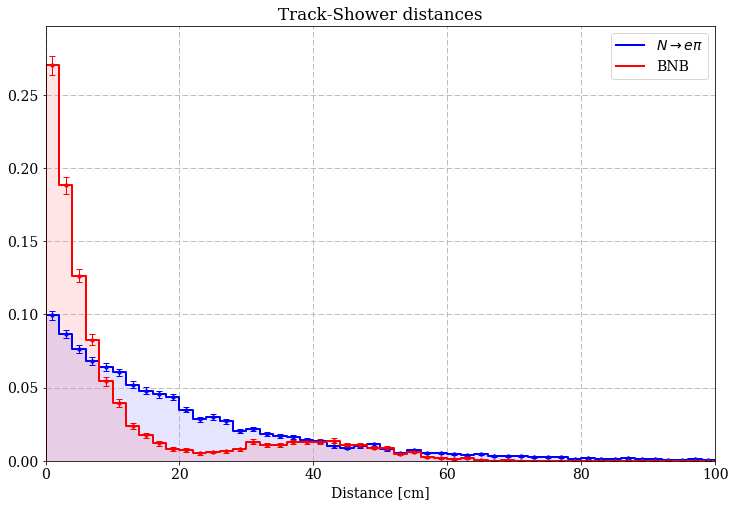

In [22]:
sigDistance = np.random.exponential(scale=20,size=10000)
bkgDistance = np.append(np.random.exponential(scale=5,size=5000),np.random.normal(loc=40,scale=10,size=1000))
nbins = 50
xlims = [0,100]

fig = plt.figure(figsize=figsize)
hepHist(sigDistance,nbins,xlims,xtrim=True,norm=True,color='blue',label=r'$N \rightarrow e \pi$',fill=True)
hepHist(bkgDistance,nbins,xlims,xtrim=True,norm=True,color='red',label='BNB',fill=True)
plt.title('Track-Shower distances')
plt.xlabel('Distance [cm]')
plt.legend()
plt.draw()